In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('max_colwidth', None)

In [2]:
data = "data/updated_pollution_dataset.csv"

df = pd.read_csv(data)
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.rename(columns={'air quality': 'air_quality'}, inplace=True)

### EDA

In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,temperature,humidity,pm2.5,pm10,no2,so2,co,proximity_to_industrial_areas,population_density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [8]:
df.shape

(5000, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   temperature                    5000 non-null   float64
 1   humidity                       5000 non-null   float64
 2   pm2.5                          5000 non-null   float64
 3   pm10                           5000 non-null   float64
 4   no2                            5000 non-null   float64
 5   so2                            5000 non-null   float64
 6   co                             5000 non-null   float64
 7   proximity_to_industrial_areas  5000 non-null   float64
 8   population_density             5000 non-null   int64  
 9   air_quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


### Visualization

In [59]:
df.head(1)

,temperature,humidity,pm2.5,pm10,no2,so2,co,proximity_to_industrial_areas,population_density,air_quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate


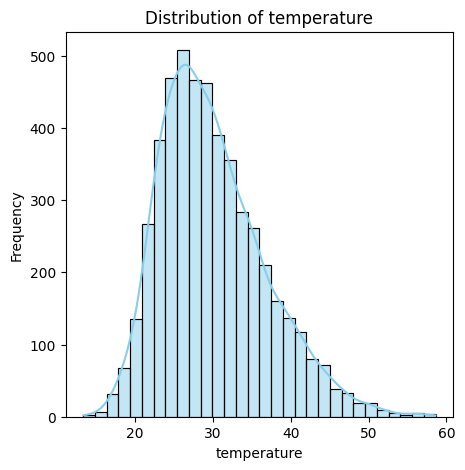

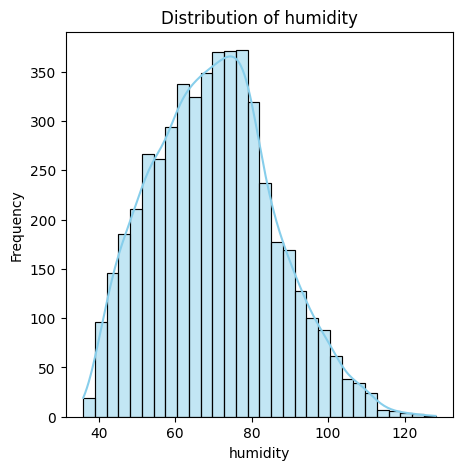

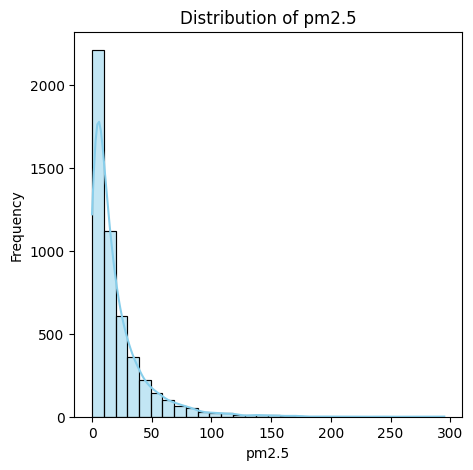

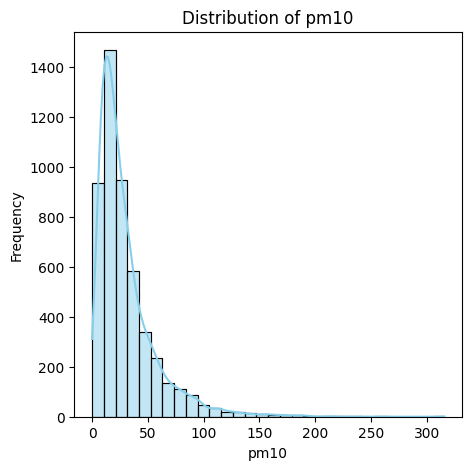

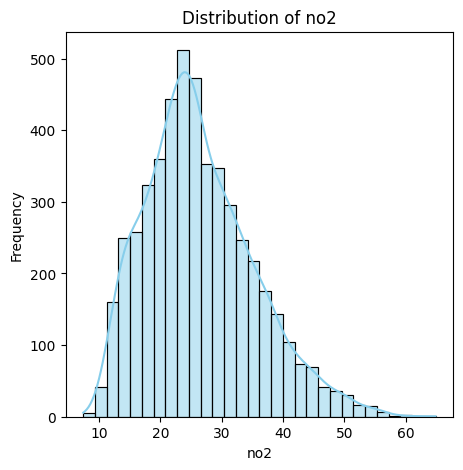

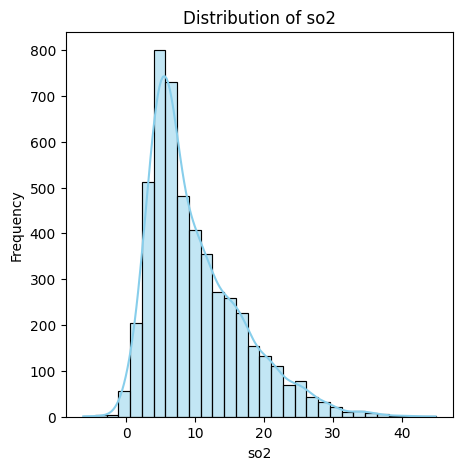

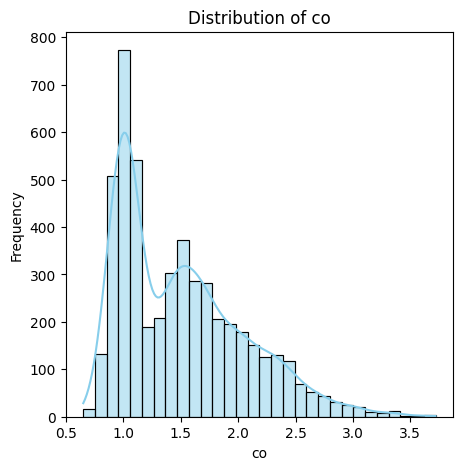

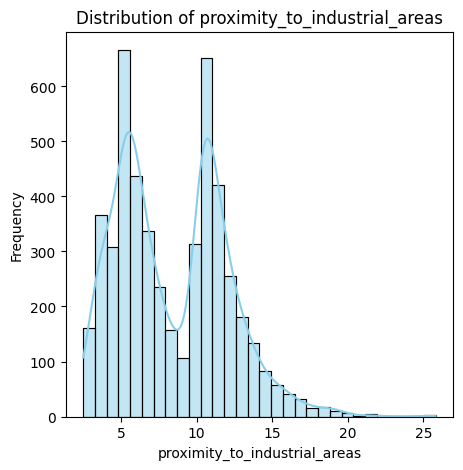

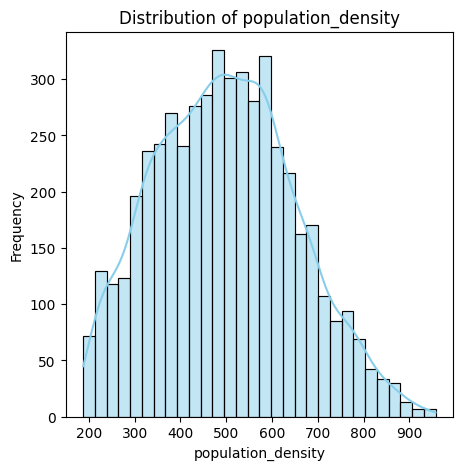

In [11]:
features = ['temperature', 'humidity', 'pm2.5', 'pm10',
            'no2', 'so2', 'co', 
            'proximity_to_industrial_areas', 'population_density']

for feature in features:
    plt.figure(figsize=(5, 5))
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


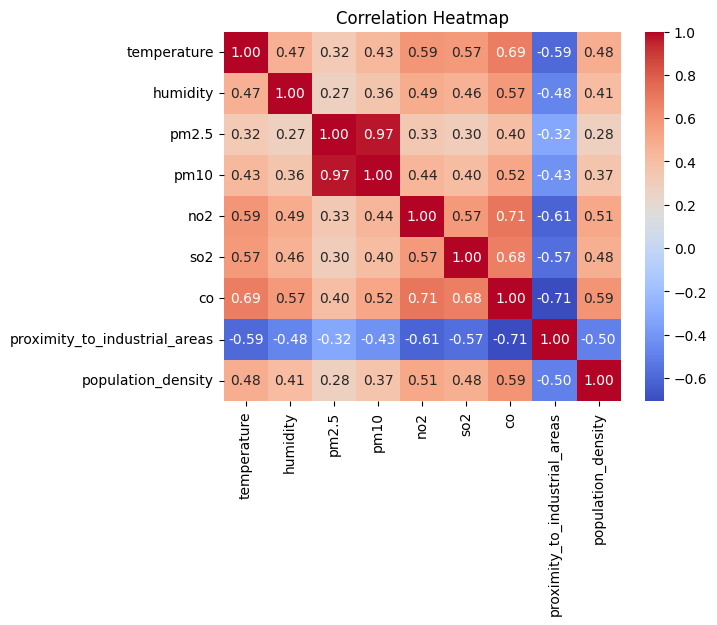

In [73]:
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

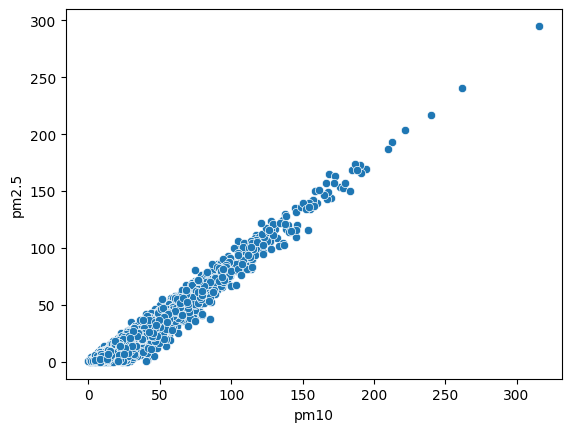

In [70]:
sns.scatterplot(x='pm10', y='pm2.5', data=df)
plt.show()

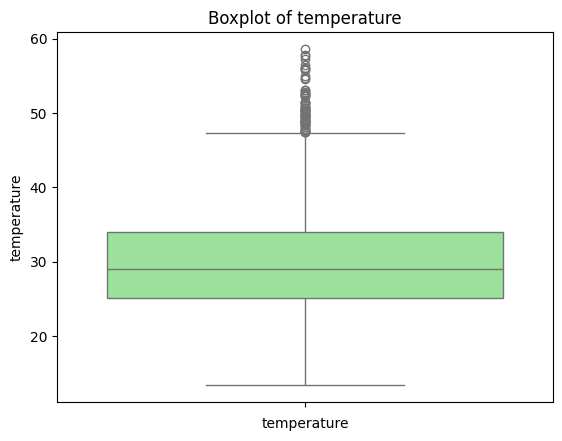

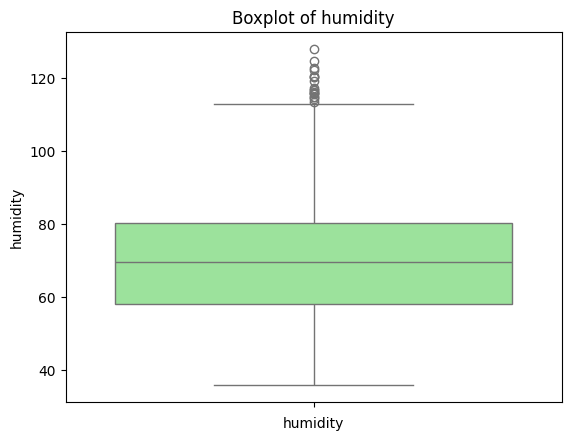

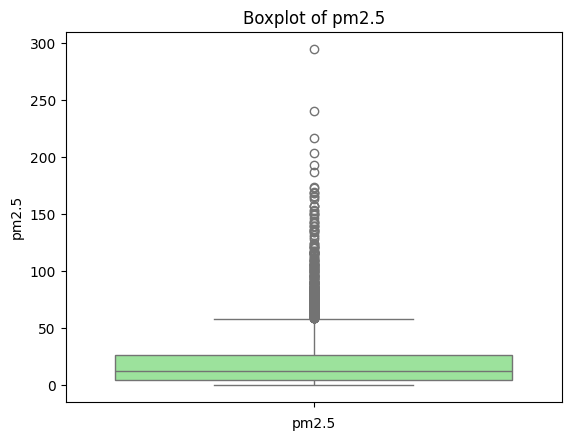

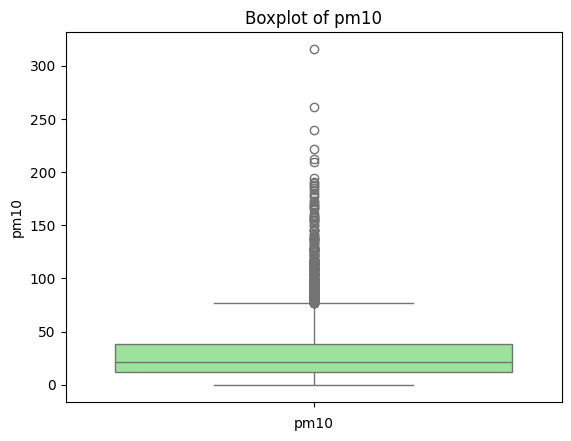

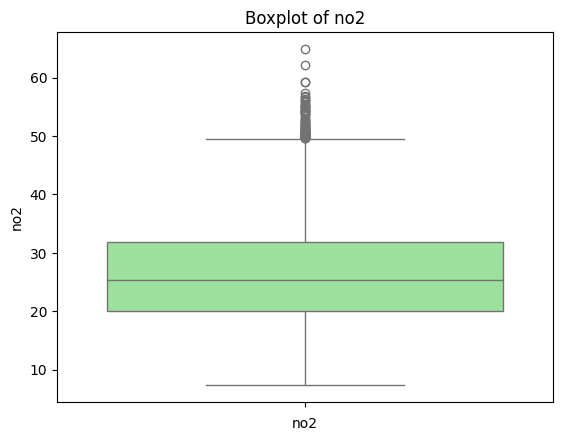

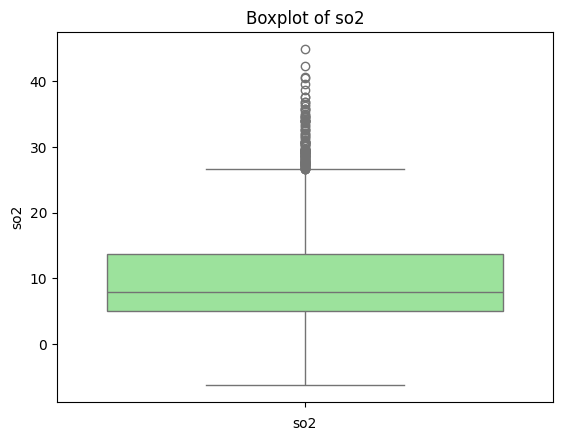

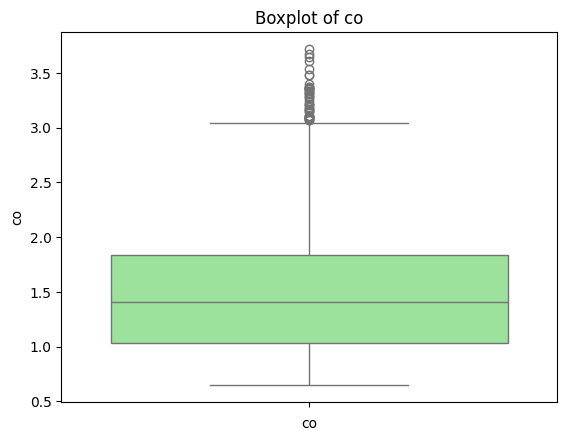

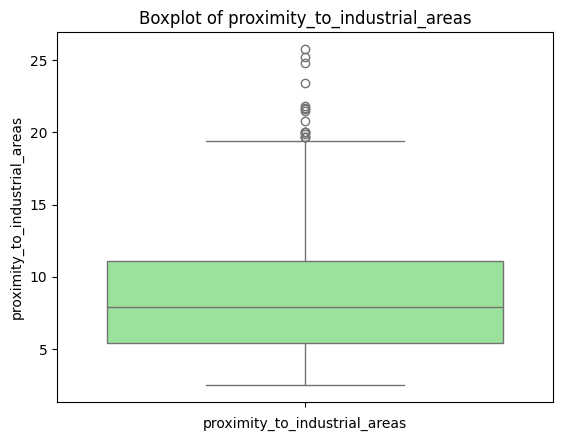

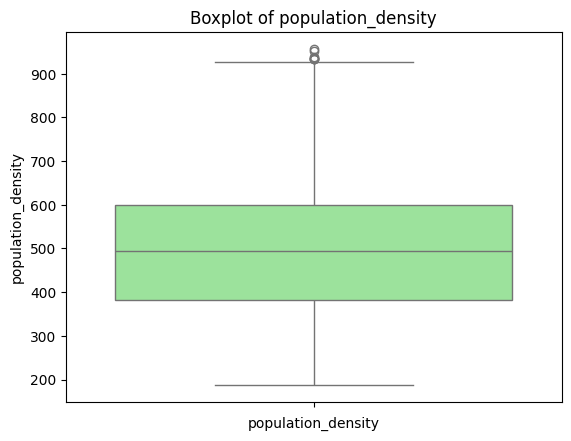

In [75]:
for feature in features:
    sns.boxplot(y=df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

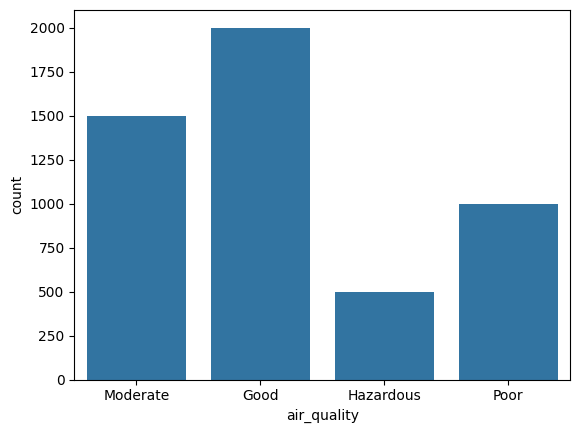

In [64]:
sns.countplot(x=df['air_quality'])
plt.show()

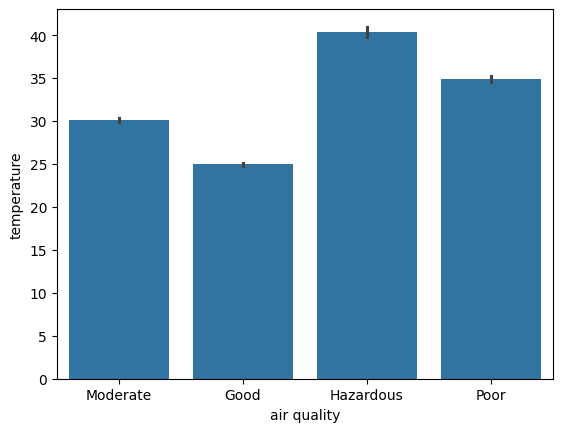

In [19]:
sns.barplot(x='air quality', y='temperature', data=df)
plt.show()

#### Feature selection/engineering

In [12]:
# Because of the high correlation between pm2.5 and pm10 we can drop one of them to avoid multicollinearity
features.remove('pm10')

In [13]:
features

['temperature',
 'humidity',
 'pm2.5',
 'no2',
 'so2',
 'co',
 'proximity_to_industrial_areas',
 'population_density']

In [14]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['air_quality'])
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42, stratify=df_full_train['air_quality'])

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from typing import Union

scaler = StandardScaler()
le = LabelEncoder()

In [16]:
def preprocess(df_train: pd.DataFrame, df_val: pd.DataFrame, df_test: pd.DataFrame, features: list) -> Union[pd.DataFrame, pd.Series]: 

    scaler.fit(df_train[features])
    X_train = scaler.transform(df_train[features])
    X_val = scaler.transform(df_val[features])
    X_test = scaler.transform(df_test[features])

    le.fit(df_train['air_quality'])
    y_train = le.transform(df_train['air_quality'])
    y_val = le.transform(df_val['air_quality'])
    y_test = le.transform(df_test['air_quality'])

    return X_train, X_val, X_test, y_train, y_val, y_test


In [17]:
X_train, X_val, X_test, y_train, y_val, y_test = preprocess(df_train, df_val, df_test, features)

#### Model selection

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [19]:
X_train.shape, X_test.shape, X_val.shape

((3000, 8), (1000, 8), (1000, 8))

In [20]:
def initiate_params():
    params = {
        'Logistic_Regression': {
            'model': LogisticRegression(),
            'params': {
            'penalty': ['l1', 'l2'],
            'C': [0.01, 0.1],
            'solver': ['newton-cg', 'liblinear']
            }
        },
        'Decision_Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 5, 10]
            }
        },
        'Random_Forest': {
            'model': RandomForestClassifier(),
            'params': {
            'n_estimators': [50, 100],
            'max_features': ['sqrt', 'log2'],
            'max_depth': [None, 10, 20],
            'criterion': ['gini', 'entropy'],
            'n_jobs': [4]
            }
        },
        'XGBoost': {
            'model': XGBClassifier(),
            'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'subsample': [0.6, 0.8],
            'colsample_bytree': [0.6, 0.8],
            'n_jobs': [4]
            }
        },
        'SVM': {
            'model': SVC(),
            'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf'],
            'gamma': ['scale', 'auto']
            }
        }
    }

    return params

In [21]:
def random_search_hyperparameter_tuning_classification(X, y, params):
    
    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=20)
    results = []

    for key, values in params.items():
        random_search = RandomizedSearchCV(
            values['model'],
            values['params'],
            cv=kf,
            return_train_score=False,
            refit=True,
            n_jobs=-1)
        random_search.fit(X, y)

        results.append({
            'model_name': key,
            'best_score': random_search.best_score_,
            'best_param': random_search.best_params_,
        })

    results_df = pd.DataFrame(results, columns=['model_name', 'best_score', 'best_param'])
    

    return results_df

In [ ]:
params = initiate_params()
results = random_search_hyperparameter_tuning_classification(X_train, y_train, params)

CPU times: total: 0 ns
Wall time: 0 ns


In [25]:
results.sort_values(by='best_score', ascending=False)

,model_name,best_score,best_param
2,Random_Forest,0.951667,"{'n_jobs': 4, 'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}"
3,XGBoost,0.948667,"{'subsample': 0.8, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6}"
4,SVM,0.940000,"{'kernel': 'rbf', 'gamma': 'auto', 'C': 1}"
0,Logistic_Regression,0.932000,"{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}"
1,Decision_Tree,0.917667,"{'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'gini'}"


In [27]:
model = RandomForestClassifier(n_estimators=100,
                               max_features='sqrt',
                               max_depth=20,
                               criterion='gini',
                               n_jobs=4)

In [28]:
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)

In [29]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.92      0.81      0.86       100
           2       0.97      0.98      0.98       300
           3       0.89      0.93      0.90       200

    accuracy                           0.96      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.96      0.96      0.96      1000



In [39]:
y_pred_test = model.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.91      0.82      0.86       100
           2       0.96      0.97      0.97       300
           3       0.88      0.90      0.89       200

    accuracy                           0.95      1000
   macro avg       0.94      0.92      0.93      1000
weighted avg       0.95      0.95      0.95      1000



In [42]:
le.inverse_transform(y_pred_test)[:5]

array(['Moderate', 'Good', 'Good', 'Poor', 'Moderate'], dtype=object)

In [43]:
import pickle

In [44]:
with open('model/model.pkl', 'wb') as f_out, \
    open('model/scaler.pkl', 'wb') as f_out1, \
    open('model/label_encoder.pkl', 'wb') as f_out2:
    pickle.dump(model, f_out)
    pickle.dump(scaler, f_out1)
    pickle.dump(le, f_out2)

In [6]:
import requests

In [38]:
url = "http://localhost:8000/predict"

data = {
    "temperature": 30.4,
    "humidity": 56.0,
    "pm2.5": 24.9,
    "pm10": 12.7,
    "no2": 13.5,
    "so2": 17.2,
    "co": 1.03,
    "proximity_to_industrial_areas": 6.7,
    "population_density": 594.0}

try:
    response = requests.post(url, json=data, timeout=5).json()
    print(response)
except requests.exceptions.RequestException as e:
    print(e)


{'predictions': 'Moderate'}
